In [7]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import Tables

The continuous description of a fluid mixture has two major applications: 

a) It can be used to improve and extend fluid characterisation through describing the plus
fraction by a number of single and multiple carbon number groups, particularly in the absence
of experimental data. 

b) The continuous distribution function may be used directly in phase behaviour models,
instead of discrete component data.

# Example 6-2
The total concentration of C7+ fraction of a gas condensate is 3.92 mole% with the analysis as follows. Extend the analysis to C30+ by SCN groups. 

In [26]:
Component = np.array(['C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14',
                     'C15', 'C16+'])
Mole = np.array([20.20, 21.41, 12.11, 9.23, 7.17, 5.68, 4.27, 3.05,
                2.43, 14.45]) / 100
M = np.array([96, 107, 121, 134, 147, 161, 175, 190, 206, 374])
S = np.array([0.730, 0.754, 0.769, 0.785, 0.799, 0.806, 0.820, 0.843,
             0.844, 0.909])
data = pd.DataFrame({'Component':Component, 'Mole%':Mole,
                    'M':M, 'S':S})
data

,Component,Mole%,M,S
0,C7,0.2020,96,0.730
1,C8,0.2141,107,0.754
2,C9,0.1211,121,0.769
3,C10,0.0923,134,0.785
4,C11,0.0717,147,0.799
5,C12,0.0568,161,0.806
6,C13,0.0427,175,0.820
7,C14,0.0305,190,0.843
8,C15,0.0243,206,0.844
9,C16+,0.1445,374,0.909


In [27]:
from scipy.optimize import curve_fit

# Define the exponential function
def exponential_func(M, A, B):
    return np.exp(A + B * M)

M = data['M'][:-1]
Mole_percent = data['Mole%'][:-1]
S = data['S'][:-1]


initial_guess = [0.0, 0.0]  # Initial guess for the parameters A and B
params_M, params_covariance_M = curve_fit(exponential_func, M, Mole_percent, p0=initial_guess)
params_S, params_covariance_S = curve_fit(exponential_func, M, S, p0=initial_guess)


# Extract the fitted parameters
fit_A, fit_B = params_M
fit_S_A, fit_S_B = params_S
# Print the fitted parameters
print("Fitted parameters M:")
print("A =", fit_A)
print("B =", fit_B)

print("Fitted parameters S:")
print("A =", fit_S_A)
print("B =", fit_S_B)


Fitted parameters M:
A = 0.5044653759077513
B = -0.020952813545975106
Fitted parameters S:
A = -0.4207252523082175
B = 0.001276235429524667


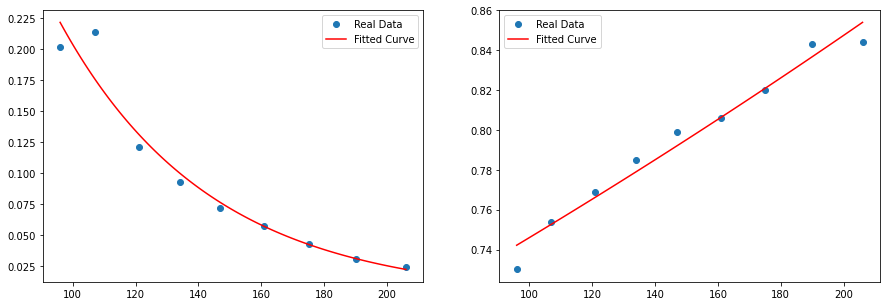

In [56]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Generate points for the fitted curve
M_fit = np.linspace(min(M), max(M), 100)
Mole_percent_fit = exponential_func(M_fit, fit_A, fit_B)
S_fit = exponential_func(M_fit, fit_S_A, fit_S_B)

# Plot the real data and the fitted curve
ax1.scatter(M, Mole_percent, label='Real Data')
ax1.plot(M_fit, Mole_percent_fit, 'r-', label='Fitted Curve')
ax2.scatter(M, S, label='Real Data')
ax2.plot(M_fit, S_fit, 'r-', label='Fitted Curve')
ax1.legend()
ax2.legend()
plt.show()

In [57]:
Property = Tables.Tabel_Property().loc['C7':'C29']
Property['Xi'] = exponential_func(Property['MW'], fit_A, fit_B)
Property['S'] = exponential_func(Property['MW'], fit_S_A, fit_S_B)

In [58]:
print(Property['Xi'].sum())
Property

0.9205029697933844


,MW,Xi,S
C7,96,0.221573,0.742148
C8,107,0.175962,0.752640
C9,121,0.131227,0.766209
C10,134,0.099937,0.779027
C11,147,0.076108,0.792060
C12,161,0.056759,0.806339
C13,175,0.042329,0.820875
C14,190,0.030913,0.836741
C15,206,0.022108,0.854003
C16,222,0.015811,0.871621


In [59]:
x_30 = 1 - Property['Xi'].sum()
print('Xc30+ = ', x_30)

Xc30+ =  0.07949703020661558


In [60]:
Mc_30 = (np.sum(data['M']*data['Mole%']) - np.sum(Property['MW']*Property['Xi']))/x_30
print('Mc30+ = ', Mc_30)

Mc30+ =  467.7348052518849


# Example 6-3
The mole fraction, molecular weight and specific gravity of the C7+ fraction of a gas condensate sample are 0.0392, 165 and 0.815, respectively. Describe the C7+ fraction by SCN groups extended to C20+. 

In [47]:
P_1 = Tables.Tabel_Property().loc['C7':'C45']
Zd = 3.92
Md = 165

In [48]:
import numpy as np
from scipy.optimize import fsolve

def equation(B):
    return np.sum((P_1['MW']-Md) * np.exp(B * P_1['MW']))

# Solve the equation using fsolve
B_solution = fsolve(equation, 0)  # Provide an initial guess for B, such as 1.0

print("The value of B is:", B_solution[0])

The value of B is: -0.013141838893065274


In [49]:
A = np.log(Zd) - np.log(np.sum(np.exp(B_solution[0] * P_1['MW'])))
print("The value of A is:", A)

The value of A is: 0.7953025029955739


In [50]:
P_1['Zcn'] = pd.DataFrame(np.exp(A+B_solution[0]*P_1['MW']))
P_1

,MW,Zcn
C7,96,0.627310
C8,107,0.542876
C9,121,0.451644
C10,134,0.380715
C11,147,0.320925
C12,161,0.266993
C13,175,0.222124
C14,190,0.182383
C15,206,0.147797
C16,222,0.119770


In [59]:
Zc_20_plus = np.sum(P_1.loc['C20':'C45']['Zcn'])
print('Zc20+ = ', Zc_20_plus)

Zc20+ =  0.40742893908662275


# Example 6-4
Describe the C7+ fraction of the fluid in Example 6.3 by a continuous function in terms of the molecular weight, and use it to estimate the mole fraction of SCN groups comprising the C7+ fraction. 

In [1]:
split = 45
Md = 165
tau = 90
gamma = 1
Beta = (Md - tau)/gamma
Mn = np.array([90 , 101.5, 114 , 127.5, 140.5, 154 , 168, 182.5, 198, 214, 229.5, 244, 257, 269, 283, 295.5, 306, 318, 330.5, 343, 354.5, 366, 377, 388, 399, 409.5, 420.5, 431.5, 441, 450.5, 460, 469.5, 479.5, 489.5, 498.5, 507, 516.5, 526, 535, 544])
print('Beta:', Beta)

Beta: 75.0


In [9]:
Zcn = np.zeros(split-7+1)
for i in range(split-7+1):
    Mn_plus = Mn[i+1]
    Mn_minus = Mn[i]
    Zcn[i] = -np.exp(tau/Beta) * (np.exp(-Mn_plus/Beta) - np.exp(-Mn_minus/Beta)) 
print('Sum Zcn:', (Zcn * 3.92).sum())

Sum Zcn: 3.910787939039456


In [10]:
Mcn = np.zeros(split-7+1)
for i in range(split-7+1):
    Mn_plus = Mn[i+1]
    Mn_minus = Mn[i]
    Mcn[i] = -Beta * np.exp(tau/Beta) * ( ((Mn_plus/Beta)+1) * np.exp(-Mn_plus/Beta) - ((Mn_minus/Beta)+1) * np.exp(-Mn_minus/Beta) ) / Zcn[i]

In [13]:
# The mole fraction of C45 has been adjusted to make the total mole equal to 3.92%, 
Zcn[-1] = Zcn[-1] + (1 - Zcn.sum()) 

In [18]:
pd.DataFrame({'MW':Mcn, 'Zcn_Normalized':Zcn , 'Zcn': 3.92*Zcn}, index=[f'C{i+7}' for i in np.arange(39)])

,MW,Zcn_Normalized,Zcn
C7,95.603113,0.142156,0.557253
C8,107.576469,0.131695,0.516243
C9,120.547609,0.119618,0.468904
C10,133.812316,0.096525,0.378378
C11,147.047609,0.084013,0.329331
C12,160.782349,0.072538,0.284349
C13,175.016534,0.062135,0.243568
C14,189.983245,0.054392,0.213217
C15,205.715771,0.045517,0.178426
C16,221.483245,0.035738,0.140094


# Example 6-5
Describe the C7+ fraction of the fluid in Example 6.3 with 4 pseudo components using the quadrature method. 

In [19]:
def G(gamma):
    A = np.array([-0.577191652, 0.988205891, -0.897056937, 0.918206857,
                  -0.756704078, 0.482199394, -0.193527818, 0.035868343])
    s = 0
    for i in range(8):
        s = s + A[i] * (gamma-1)**(i+1)
    return 1 + s

In [23]:
gamma = 1
Md = 165
tau = 90
gamma = 1
Beta = (Md - tau)/gamma
X = (Md - tau)/Beta
print('G(gamma):',G(gamma))
print('X:', X)

G(gamma): 1.0
X: 1.0


In [27]:
wk = np.array([0.6032, 0.3574, 0.0389, 0.0005])
zk = wk
zk

array([6.032e-01, 3.574e-01, 3.890e-02, 5.000e-04])

In [28]:
Xk = np.array([0.3226, 1.7458, 4.5366, 9.3951])
Mk = Xk*Beta + tau
Mk

array([114.195 , 220.935 , 430.245 , 794.6325])